In [1]:
# First we construct the variational quantum circuit

import numpy as np
import pennylane as qml
from pennylane import expval, var
from matplotlib import pyplot as plt


dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(params):

    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 8, wires=2)

    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    
    qml.RY(params[2], wires=1)
    qml.RX(params[3], wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    qml.RZ(params[2], wires=1)
    qml.RZ(params[3], wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    
    return qml.expval(qml.PauliY(0))

init_params = np.array([0.4, -0.1, 0.5, 0.2])

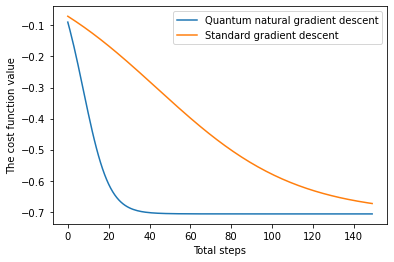

In [2]:
# Now we apply both the Natural and standard gradient descent optimizer

steps = 150
gd_cost = []
qng_cost = []
opt = qml.GradientDescentOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    gd_cost.append(circuit(theta))
    
opt = qml.QNGOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    qng_cost.append(circuit(theta))

plt.plot(qng_cost, label="Quantum natural gradient descent")
plt.plot(gd_cost, label="Standard gradient descent")
plt.legend()
plt.ylabel("The cost function value")
plt.xlabel("Total steps")
plt.show()